### NAME : VANSH KOLTE
### ROLL_NO : 62
### DATE : 15/10/2024
### PRACTICAL_7

## Aim : A shopkeeper keeps records
## of his customers like age, gender, and annual income. Now, he wants to enhance
## his business by offering attractive deals. How should the shopkeeper provide
## these offers to his customers. Create machine learning model using Kmeans
## algorithm and help shopkeeper to identify group of customers.

# BASIC EDA

In [369]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [371]:
sh = pd.read_excel("shop.xlsx")
sh.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [373]:
sh.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [375]:
sh.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [377]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [379]:
sh.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [381]:
sh.shape

(200, 5)

In [383]:
sh.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [385]:
features = sh.drop(['CustomerID','Age','Genre'], axis = 1)
features.shape


(200, 2)

In [464]:
from sklearn.cluster import KMeans

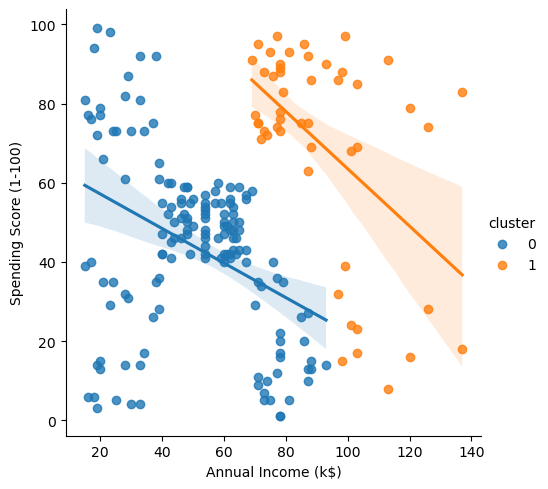

In [474]:
my_cluster_model = KMeans(n_clusters=2)
my_cluster_model.fit(features)
sh['cluster'] = my_cluster_model.labels_
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=sh,hue='cluster');
plt.show()

In [476]:
my_cluster_model.cluster_centers_

array([[50.59602649, 43.82119205,  0.40397351],
       [91.26530612, 69.85714286,  1.        ]])

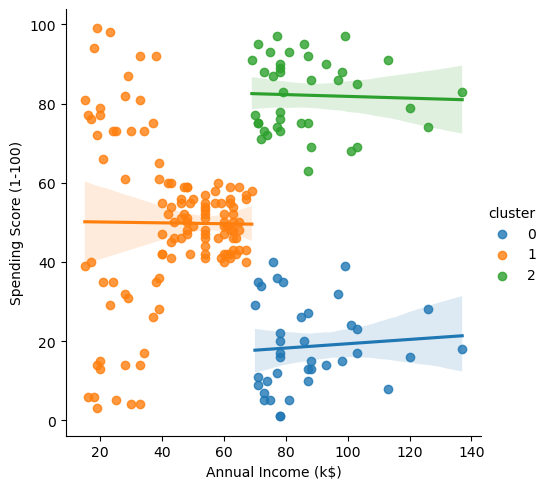

In [478]:
my_cluster_model = KMeans(n_clusters=3)
my_cluster_model.fit(features)
sh['cluster'] = my_cluster_model.labels_
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=sh,hue='cluster');
plt.show()

In [480]:
my_cluster_model.cluster_centers_

array([[87.        , 18.63157895,  1.        ],
       [44.15447154, 49.82926829,  0.26829268],
       [86.53846154, 82.12820513,  1.        ]])

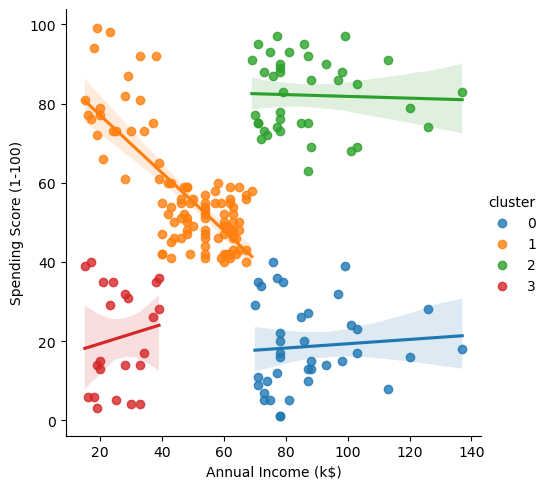

In [482]:
my_cluster_model = KMeans(n_clusters=4)
my_cluster_model.fit(features)
sh['cluster'] = my_cluster_model.labels_
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=sh,hue='cluster');
plt.show()

In [484]:
my_cluster_model.cluster_centers_

array([[ 8.70000000e+01,  1.86315789e+01,  1.00000000e+00],
       [ 4.82600000e+01,  5.64800000e+01,  3.30000000e-01],
       [ 8.65384615e+01,  8.21282051e+01,  1.00000000e+00],
       [ 2.63043478e+01,  2.09130435e+01, -1.11022302e-16]])

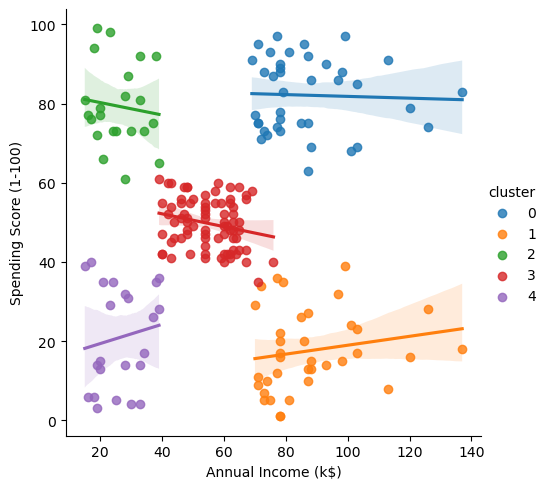

In [486]:
my_cluster_model = KMeans(n_clusters=5)
my_cluster_model.fit(features)
sh['cluster'] = my_cluster_model.labels_
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=sh,hue='cluster');
plt.show()

In [488]:
my_cluster_model.cluster_centers_

array([[ 8.65384615e+01,  8.21282051e+01,  1.00000000e+00],
       [ 8.77500000e+01,  1.75833333e+01,  1.00000000e+00],
       [ 2.57272727e+01,  7.93636364e+01, -1.11022302e-16],
       [ 5.50875000e+01,  4.97125000e+01,  4.37500000e-01],
       [ 2.63043478e+01,  2.09130435e+01, -1.11022302e-16]])

# Finding K value

## silhouette_score Method

In [492]:
from sklearn.metrics import silhouette_score
# s = (b - a) / max(a, b)

In [494]:
range_n_clusters = [2, 3, 4, 5 ,6 , 7 ,8]
for n_clusters in range_n_clusters:
    my_cluster_model = KMeans(n_clusters=n_clusters)
    m = my_cluster_model.fit_predict(features)
    silhouette_avg = silhouette_score(features, m)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2917772017447256
For n_clusters = 3 The average silhouette_score is : 0.4675493096092754
For n_clusters = 4 The average silhouette_score is : 0.4930815987311572
For n_clusters = 5 The average silhouette_score is : 0.5537912602163124
For n_clusters = 6 The average silhouette_score is : 0.4567906662076871
For n_clusters = 7 The average silhouette_score is : 0.5320059332033423
For n_clusters = 8 The average silhouette_score is : 0.503168911921447


## Elbow Method

In [497]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)  #the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [499]:
wcss

[270030.77999999997,
 186401.36364982964,
 154749.88924004504,
 73902.86278425413,
 44468.45544793371,
 37578.92202302528,
 30585.81821885946,
 28843.95118318974,
 23767.348453223556,
 21614.945714626963]

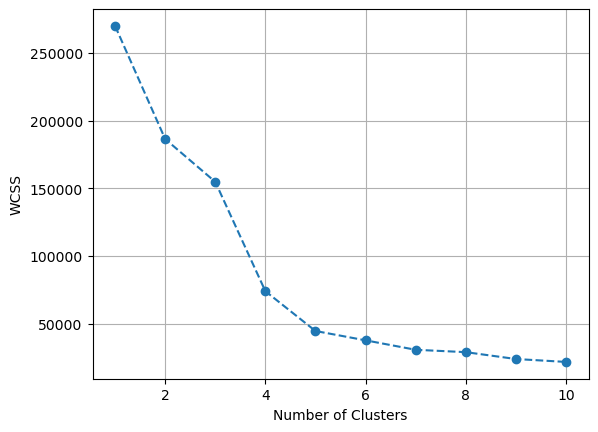

In [501]:
plt.plot(range(1,11),wcss,"o--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
print('Conclusion : In this practical the value of K is 5  by refering silhouette_score Method . For n_clusters = 5 The average silhouette_score is : 0.5537912602163124')